> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate Medical Appointment No Show

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In this project I investigate a dataset of appoinment records in public hospitals in Brazil. The dataset includes whether the patient showed up to the appointment, as well as other features of the patient and the appointment.

## Question:
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from IPython.core.display import HTML
sns.set()
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
# HTML('<style> code {background-color:#E8E8E8 !important;} </style>')

<a id='wrangling'></a>
# Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
fpath = 'data/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(fpath)

# rename columns
df.columns = [
    'patient_id', 'appointment_id', 'gender', 'scheduled_day',
    'appointment_day', 'age', 'neighbourhood', 'scholarship',
    'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
    'no_show'
]

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- `scheduled_day` is time but `appointment_day` is date

## [Overview](https://www.kaggle.com/joniarroba/noshowappointments/home)
### Context
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? If this is help, don´t forget to upvote :) Greatings!

### Content
300k medical appointments and its 15 variables (characteristics) of each. The most important one if the patient show-up or no-show the appointment. Variable names are self-explanatory, if you have doubts, just let me know!

scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

### Data Dictionary
- `patient_id` = Identification of a patient
- `appointment_id` = Identification of each appointment
- `gender` = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- `scheduled_day` = The day someone called or registered the appointment, this is before appointment of course.
- `appointment_ay` = The day of the actuall appointment, when they have to visit the doctor.
- `age` = How old is the patient.
- `neighbourhood` = Where the appointment takes place.
- `scholarship` = Ture of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- `hipertension` = True or False
- `diabetes` = True or False
- `alcoholism` = True or False
- `handcap` = True or False
- `sms_received` = 1 or more messages sent to the patient.
- `no-show` = True or False.

*Nighbourhood means the place where the hospital is located and not where the patient lives

### Inspiration
What if that possible to predict someone to no-show an appointment?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- There is no row which contains null values
- `patient_id` needs to be converted to float
- ScheduledDay and AppointmentDay are string. I'll convert them to datetime.

In [4]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- `age` has outliers. What does '-1' mean? Does '0' mean babies?

In [5]:
df.nunique()

patient_id          62299
appointment_id     110527
gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hypertension            2
diabetes                2
alcoholism              2
handicap                5
sms_received            2
no_show                 2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- `patient_id` is not distinct. I'll look into it in more detail later.
- `appointment_id` is distinct.
- Why does `handcap` have 5 unique values? The provider of this dataset says it is a boolean (True or False).
- Other boolean features have only two unique values.

In [7]:
df.duplicated().sum()

0

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

# Data Cleaning

### Convert `patient_id` to int 

In [8]:
df['patient_id'] = df['patient_id'].astype(int)

### Remove negative `age`

In [9]:
print(np.sort(df['age'].unique()))

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [10]:
df = df[df['age'] >= 0]

### Covert `scheduled_day` and `appointment_day` to datetime 

- `AppointmentID` is distinct but `PatientId` isn't

In [11]:
df['patient_id'].value_counts().sort_values(ascending=False).head()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
258424392677       62
Name: patient_id, dtype: int64

In [12]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

### Check if there are rows whose `appointment_day` is before `scheduled_day`

In [13]:
wait_days = (df['appointment_day'].dt.date - df['scheduled_day'].dt.date).dt.days
insert_col = df.columns.get_loc('appointment_day') + 1
df.insert(insert_col, 'days_to_app', wait_days)
print(len(df.index))
df = df[df['days_to_app'] >= 0]
print(len(df.index))

110526
110521


#### Investigation of  `patient_id`

In [14]:
df['patient_id'].value_counts().sort_values(ascending=False).head()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
871374938638855    62
Name: patient_id, dtype: int64

In [15]:
df[df['patient_id'] == 822145925426128]['scheduled_day'].dt.date.value_counts().head()

2016-05-13    7
2016-06-01    6
2016-05-25    5
2016-06-08    5
2016-05-20    5
Name: scheduled_day, dtype: int64

In [16]:
df[(df['patient_id'] == 822145925426128) & (df['scheduled_day'].dt.day == 13)].sort_values('scheduled_day')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,days_to_app,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
8850,822145925426128,5694863,M,2016-05-13 09:04:50,2016-05-13,0,38,REDENÇÃO,0,0,0,0,0,0,No
31572,822145925426128,5695919,M,2016-05-13 11:15:37,2016-05-13,0,38,REDENÇÃO,0,0,0,0,0,0,No
7677,822145925426128,5696169,M,2016-05-13 11:53:41,2016-05-13,0,38,REDENÇÃO,0,0,0,0,0,0,No
7202,822145925426128,5696852,M,2016-05-13 14:26:40,2016-05-16,3,38,REDENÇÃO,0,0,0,0,0,0,No
109185,822145925426128,5696863,M,2016-05-13 14:28:49,2016-06-02,20,38,REDENÇÃO,0,0,0,0,0,1,No
7199,822145925426128,5697449,M,2016-05-13 15:57:00,2016-05-20,7,38,REDENÇÃO,0,0,0,0,0,0,No
25515,822145925426128,5697763,M,2016-05-13 18:09:14,2016-05-20,7,38,REDENÇÃO,0,0,0,0,0,0,No


This patient made 7 appointments and visited the hospital 3 times on 2016-05-13. This isn't impossible, but how was `scheduled_day` determined?

I'll take a look at one more person.

In [17]:
df[df['patient_id'] == 99637671331]['scheduled_day'].dt.date.value_counts().head()

2016-06-08    6
2016-06-01    6
2016-05-09    6
2016-05-19    5
2016-05-30    5
Name: scheduled_day, dtype: int64

In [18]:
df[(df['patient_id'] == 99637671331) & (df['scheduled_day'].dt.day == 1)].sort_values('scheduled_day')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,days_to_app,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
109241,99637671331,5756852,M,2016-06-01 08:43:24,2016-06-01,0,46,JABOUR,0,0,0,0,0,0,No
108824,99637671331,5759101,M,2016-06-01 11:46:29,2016-06-01,0,46,JABOUR,0,0,0,0,0,0,No
108793,99637671331,5759132,M,2016-06-01 11:50:16,2016-06-01,0,46,JABOUR,0,0,0,0,0,0,No
98834,99637671331,5760275,M,2016-06-01 14:34:09,2016-06-01,0,46,JABOUR,0,0,0,0,0,0,No
108756,99637671331,5760533,M,2016-06-01 15:01:01,2016-06-01,0,46,JABOUR,0,0,0,0,0,0,No
109118,99637671331,5761324,M,2016-06-01 17:17:19,2016-06-01,0,46,JABOUR,0,0,0,0,0,0,No


This patient visited the hostpital 6 times in a day, but if the hospital counts consecutive visits to different departments, this could be possible.

### Check the cleaned dataset

In [19]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,days_to_app,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
# Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Create new columns

In [20]:
# day of the week
df.insert(df.columns.get_loc('scheduled_day') + 1, 'scheduled_dow', df['scheduled_day'].dt.weekday)
df.insert(df.columns.get_loc('appointment_day') + 1, 'appointment_dow', df['appointment_day'].dt.weekday)

# age group
df.insert(df.columns.get_loc('age') + 1, 'age_group',df['age'].apply(lambda x: min(x//10, 10)))

# The provider of this dataset says handicap is a boolean value, but it actually has 5 unique values (the severity of handicap).
# There might be some relationship between the no-show rate and the severity of handicap.
# I'll craete a new feature named is_handicapped which represents whether the patient has handicap
df.insert(df.columns.get_loc('handicap') + 1, 'is_handicapped',df['handicap'].apply(lambda x: int(x > 0)))
df.head()

,patient_id,appointment_id,gender,scheduled_day,scheduled_dow,appointment_day,appointment_dow,days_to_app,age,age_group,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,is_handicapped,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,4,2016-04-29,4,0,62,6,JARDIM DA PENHA,0,1,0,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,4,2016-04-29,4,0,56,5,JARDIM DA PENHA,0,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,4,2016-04-29,4,0,62,6,MATA DA PRAIA,0,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,4,2016-04-29,4,0,8,0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,4,2016-04-29,4,0,56,5,JARDIM DA PENHA,0,1,1,0,0,0,0,No


In [21]:
def tick_group_num(ser):
    """
    Create ticklabels like 12(n=1442)
    """
    return [str(group) + ' (n={})'.format(num) for group, num in zip(ser.index, ser.tolist())]

In [22]:
df_no = df[df['no_show'] == 'Yes']  # patients who didn't show up
df_yes = df[df['no_show'] == 'No']  # patients who showed up
print('No-show:', df_no.size)
print('Show:', df_yes.size)
print('Show-up rate:', df_yes.size / df.size)

No-show: 423966
Show: 1675933
Show-up rate: 0.798101718225


### Schuduled day of the week

In [23]:
sch_dow_no = df_no.groupby('scheduled_dow').size()
sch_dow_yes = df_yes.groupby('scheduled_dow').size()
sch_dow_total = df.groupby('scheduled_dow').size()
sch_dow_total

scheduled_dow
0    23084
1    26167
2    24259
3    18072
4    18915
5       24
dtype: int64

- The number of patients who made appointments in Saturday is very small. I guess that's because Saturday and Sunday are day-off for the hospitals.

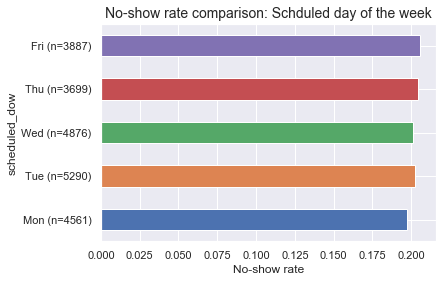

In [24]:
import calendar
dow_str = calendar.weekheader(3).split()
yticklabels = [str(x) + ' (n={})'.format(num) for x, num in zip(dow_str, sch_dow_no)]
(sch_dow_no / sch_dow_total).plot('barh')
locs, _ = plt.yticks()
plt.xlabel('No-show rate')
plt.yticks(locs, yticklabels)
plt.title('No-show rate comparison: Schduled day of the week', fontsize=14)
plt.ylim([-0.5, 4.5])  # ignore Saturday because the number of samples is very small and its result is unreliable
plt.show()
# n in the y ticklabels represents the number of the patients who didn't show up

The differences are very small. This feature doesn't seem to affet the no-show rate.

### Appointment day of the week

In [25]:
app_dow_no = df_no.groupby('appointment_dow').size()
app_dow_yes = df_yes.groupby('appointment_dow').size()
app_dow_total = df.groupby('appointment_dow').size()

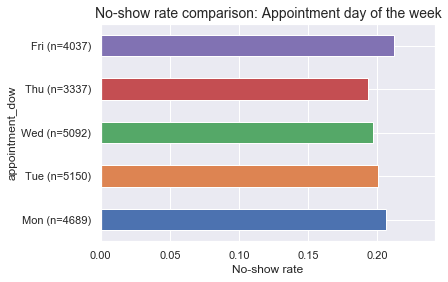

In [26]:
import calendar
calendar.weekheader(3).split()
dow_str = calendar.weekheader(3).split()
ytick_labels = [str(x) + ' (n={})'.format(num) for x, num in zip(dow_str, app_dow_no)]
(app_dow_no / app_dow_total).plot('barh')
locs, _ = plt.yticks()
plt.xlabel('No-show rate')
plt.yticks(locs, ytick_labels)
plt.title('No-show rate comparison: Appointment day of the week', fontsize=14)
plt.ylim([-0.5, 4.5])  # ignore Saturday because the number of data is very small and its result is unreliable
plt.show()

# n in the y ticklabels represents the number of the patients who didn't show up

- Similar to the schedule day of the week.

### Scheduled Day

In [27]:
min_date = min(df['scheduled_day'])
max_date = max(df['scheduled_day'])
print(min_date, max_date)

2015-11-10 07:13:56 2016-06-08 20:07:23


In [28]:
sch_by = [df['scheduled_day'].dt.year, df['scheduled_day'].dt.month]
df_sch = df.groupby(sch_by)
df_sch.size()

scheduled_day  scheduled_day
2015           11                   1
               12                  61
2016           1                   60
               2                  281
               3                 3614
               4                25339
               5                67416
               6                13749
dtype: int64

- `SchduledDay` has a weird disribution. The number of samples in Apr, May, and Jun is much larger than the rest.

### Appointment Day

In [29]:
min_date = min(df['appointment_day'])
max_date = max(df['appointment_day'])
print(min_date, max_date)

2016-04-29 00:00:00 2016-06-08 00:00:00


- `AppointmentDay` spans over about 1 month while `ScheduledDay` spans over about 7 month.
- Now it makes sense that `ScheduledDay` has a weird distribution.

### Days to Appointment

In [30]:
wd_yes = df_yes.groupby('days_to_app').size().sort_values(ascending=False)
wd_no = df_no.groupby('days_to_app').size().sort_values(ascending=False)
wd_total = df.groupby('days_to_app').size()
wd_total.head()

days_to_app
0    38562
1     5213
2     6725
3     2737
4     5290
dtype: int64

- Most of the patients schedule their appointments and visit the hospitals on the same day. 

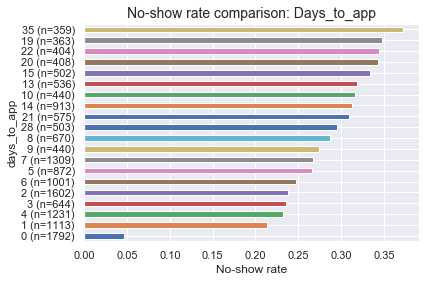

In [31]:
wd_rate = (wd_no / wd_total[wd_no.index])
wd_rate.iloc[:20].sort_values().plot('barh')
locs, labels = plt.yticks()
labels = list(map(lambda x: x.get_text(), labels))
ytick_labels = [label + ' (n={})'.format(wd_no[int(label)]) for label in labels]
plt.xlabel('No-show rate')
plt.yticks(locs, ytick_labels[:20])
plt.title('No-show rate comparison: Days_to_app', fontsize=14)
plt.show()

- The patients who schedule their appointments and visit the hospitals on the same day, have a very low no-show rate.
- The longer `days_to_app` is, The less likely the patients are to show up.

### Age

In [32]:
age_no = df_no.groupby('age_group').size()
age_yes = df_yes.groupby('age_group').size()
age_total = df.groupby('age_group').size()
age_rate = age_no / age_total
print(age_total)

age_group
0     17474
1     12935
2     13698
3     15170
4     14209
5     15863
6     11876
7      5934
8      2945
9       406
10       11
dtype: int64


- The number of patients older than 100 is very low.

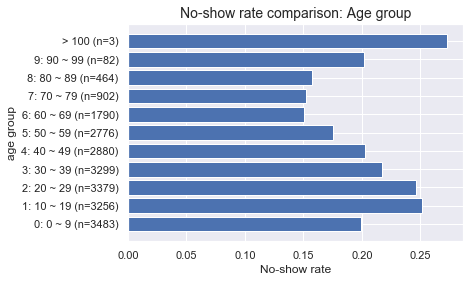

No-show rate mean: 0.20253283482


In [33]:
# plot the results
ytick_labels = ['{}: {} ~ {} (n={})'.format(x, x*10, (x+1)*10 - 1, age_no[x]) for x in range(len(age_no))]
ytick_labels[-1] = '> 100 (n={})'.format(age_no[10])
idx = np.arange(len(age_no))
plt.barh(idx, age_rate)
plt.ylabel('age group')
plt.xlabel('No-show rate')
plt.yticks(idx, ytick_labels, rotation=0, ha='right')
plt.title('No-show rate comparison: Age group', fontsize=14)
# plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()
print('No-show rate mean:', (age_no / age_total).mean())

- Age group 1 and 2 have a high no-show rate.
- Age group 5~8 have a low no-show rate.
- Age group 0 and 9 have the average no-show rate
- The no-show rate of Age group 10 is not reliable because the number of samples is very mall as discussed above.

### Gender

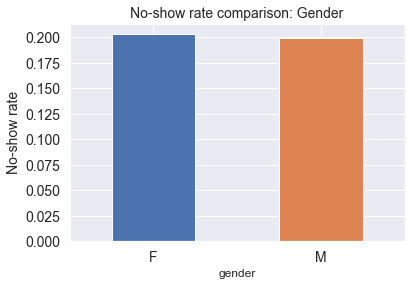

In [34]:
gen_no = df_no.groupby('gender').size()
gen_yes = df_yes.groupby('gender').size()
gen_total = df.groupby('gender').size()
gen_rate = gen_no / gen_total

gen_rate.plot('bar', fontsize=14, rot=0)
plt.ylabel('No-show rate', fontsize=14)
plt.title('No-show rate comparison: Gender', fontsize=14)
plt.show()

The no-show rates are almost the same.

### Age + Gender

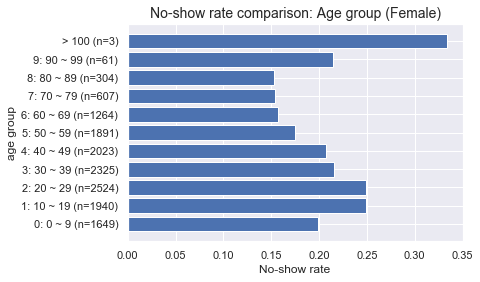

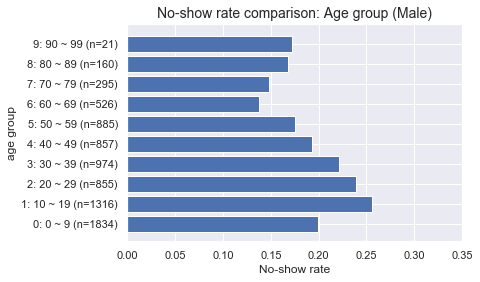

In [35]:
# Female
female_index = (df['gender'] == 'F')
age_f_no = df_no[female_index].groupby('age_group').size()
age_f_yes = df_yes[female_index].groupby('age_group').size()
age_f_total = df[female_index].groupby('age_group').size()
age_f_rate = age_f_no / age_f_total

ytick_labels = ['{}: {} ~ {} (n={})'.format(x, x*10, (x+1)*10 - 1, age_f_no[x]) for x in range(len(age_f_no))]
ytick_labels[-1] = '> 100 (n={})'.format(age_f_no[10])
idx = np.arange(len(age_f_no))
plt.barh(idx, age_f_rate)
plt.ylabel('age group')
plt.xlabel('No-show rate')
plt.yticks(idx, ytick_labels, rotation=0, ha='right')
plt.title('No-show rate comparison: Age group (Female)', fontsize=14)
plt.show()

# Male
male_index = (df['gender'] == 'M')
age_m_no = df_no[male_index].groupby('age_group').size()
age_m_yes = df_yes[male_index].groupby('age_group').size()
age_m_total = df[male_index].groupby('age_group').size()
age_m_rate = age_m_no / age_m_total

ytick_labels = ['{}: {} ~ {} (n={})'.format(x, x*10, (x+1)*10 - 1, age_m_no[x]) for x in range(len(age_m_no))]
# ytick_labels[-1] = '> 100 (n={})'.format(age_m_no[10])
idx = np.arange(len(age_total))
plt.barh(idx, age_m_rate)
plt.ylabel('age group')
plt.xlabel('No-show rate')
plt.yticks(idx, ytick_labels, rotation=0, ha='right')
plt.title('No-show rate comparison: Age group (Male)', fontsize=14)
plt.xlim([0, 0.35])
plt.show()

- The overall trends are similar.
- For the age group 9, the female patients have a higher no-show rate but I'm not sure if this is reliable due to a small amout of samples.

### SMS_received

Text(0.5,1,'days_to_app vs. SMS received rate')

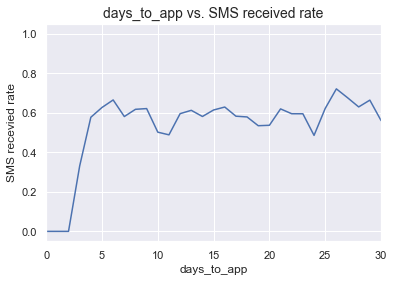

In [36]:
# Check when sms reminders are sent
sms_yes = df[df['sms_received'] == 1].groupby('days_to_app').size()
sms_no = df[df['sms_received'] == 0].groupby('days_to_app').size()
sms_total = df.groupby('days_to_app').size()
sms_received_rate = sms_yes / sms_total
sms_received_rate.fillna(0).plot()
plt.xlim([0, 30])
plt.ylabel('SMS recevied rate')
plt.title('days_to_app vs. SMS received rate', fontsize=14)

- None of the patients received SMS reminders if the appointment day is 2 days away from the schduled day. This indicates SMS reminders were not sent to these patients. I'll remove the patients with `days_to_app` < 3 becasue including these patients will decrease the no-show rate of the SMS-not-received group.

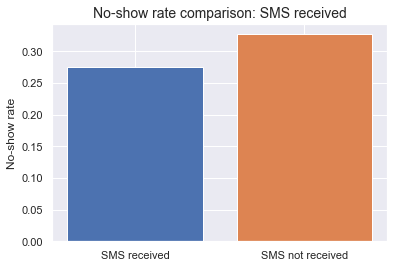

No-show rate difference: 0.0512034900282


In [37]:
# Check the no-show rate
index_yes = (df['sms_received'] == 1) & (df['no_show'] == 'Yes') & (df['days_to_app'] >= 3)
index_no = (df['sms_received'] == 0) & (df['no_show'] == 'Yes') & (df['days_to_app'] >= 3)

sms_yes_rate = df[index_yes].size / df[(df['sms_received'] == 1) & (df['days_to_app'] >= 3)].size
sms_no_rate = df[index_no].size / df[(df['sms_received'] == 0) & (df['days_to_app'] >= 3)].size
plt.bar(0, sms_yes_rate)
plt.bar(1, sms_no_rate)
plt.xticks([0, 1], ['SMS received', 'SMS not received'])
plt.ylabel('No-show rate')
plt.title('No-show rate comparison: SMS received', fontsize=14)
plt.show()
print('No-show rate difference:', sms_no_rate - sms_yes_rate)

The patients who didn't receive sms reminders have a higher no-show rate. This makes sense because people are more likely to show up if they receive reminders.

### Handcap

In [38]:
df['handicap'].value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: handicap, dtype: int64

- Most of the patients don't have handicap. It is difficult to evaluate the relationship between the no-show rate and the severity of handcap becasue the number of samples in handicap 2~4 is too small. Instead of `handicap`, I'll use `is_handicapped` in the following seciton to see how this feature affect the no-show rate.

Text(0.5,1,'No-show rate comparison: the severity of handicap')

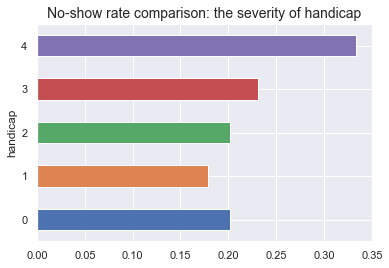

In [39]:
handi_yes = df_yes.groupby('handicap').size()
handi_no = df_no.groupby('handicap').size()
handi_total = df.groupby('handicap').size()
# print(handi_yes, handi_no, handi_total, sep='\n'*2)
(handi_no / handi_total).plot('barh')
plt.title('No-show rate comparison: the severity of handicap', fontsize=14)

### Boolean features (scholarship, hipertension, diabetes, alcoholism, is_handicapped )

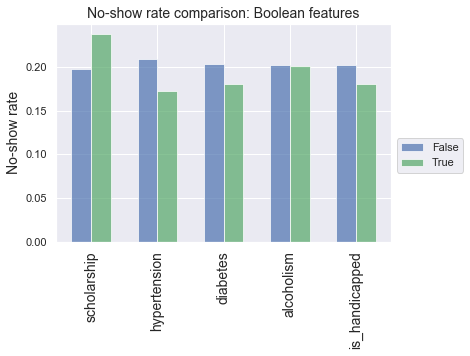

In [40]:
cols = ['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'is_handicapped']
true_no = df_no[cols].sum()
true_yes = df_yes[cols].sum()
false_no = df_no[cols].count() - true_no
false_yes = df_yes[cols].count() - true_yes
true_total = df[cols].sum()
false_total = df[cols].count() - true_total
true_rate = true_no / true_total
false_rate = false_no / false_total
idx = np.arange(len(cols))

bar_width = 0.3
plt.bar(idx, false_rate, bar_width, color='b', alpha=0.7, label='False')
plt.bar(idx + bar_width, true_rate, bar_width, color='g', alpha=0.7, label='True')
plt.xticks(idx + bar_width / 2, cols, fontsize=14, rotation=90)
plt.ylabel('No-show rate', fontsize=14)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.title('No-show rate comparison: Boolean features', fontsize=14)
plt.show()

`hypertension`, `diabetes` and `is_handicapped` seems to be related a lower no-show rate, while the patients with `scholarship` were less likely to keep their appointments

### Gender + Boolean features

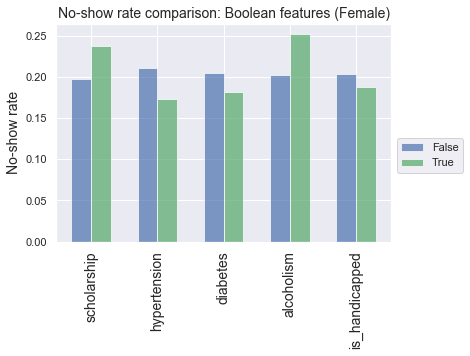

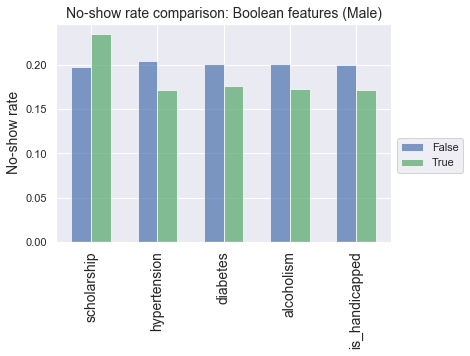

In [41]:
# Female
cols = ['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'is_handicapped']
true_no = df_no[female_index][cols].sum()
true_yes = df_yes[female_index][cols].sum()
false_no = df_no[female_index][cols].count() - true_no
false_yes = df_yes[female_index][cols].count() - true_yes
true_total = df[female_index][cols].sum()
false_total = df[female_index][cols].count() - true_total
true_rate = true_no / true_total
false_rate = false_no / false_total
idx = np.arange(len(cols))

bar_width = 0.3
plt.bar(idx, false_rate, bar_width, color='b', alpha=0.7, label='False')
plt.bar(idx + bar_width, true_rate, bar_width, color='g', alpha=0.7, label='True')
plt.xticks(idx + bar_width / 2, cols, fontsize=14, rotation=90)
plt.ylabel('No-show rate', fontsize=14)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.title('No-show rate comparison: Boolean features (Female)', fontsize=14)
plt.show()

# Male
true_no = df_no[male_index][cols].sum()
true_yes = df_yes[male_index][cols].sum()
false_no = df_no[male_index][cols].count() - true_no
false_yes = df_yes[male_index][cols].count() - true_yes
true_total = df[male_index][cols].sum()
false_total = df[male_index][cols].count() - true_total
true_rate = true_no / true_total
false_rate = false_no / false_total
idx = np.arange(len(cols))

bar_width = 0.3
plt.bar(idx, false_rate, bar_width, color='b', alpha=0.7, label='False')
plt.bar(idx + bar_width, true_rate, bar_width, color='g', alpha=0.7, label='True')
plt.xticks(idx + bar_width / 2, cols, fontsize=14, rotation=90)
plt.ylabel('No-show rate', fontsize=14)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.title('No-show rate comparison: Boolean features (Male)', fontsize=14)
plt.show()

- The female patients with alcoholism have a much higher no-show rate than the male patients with alcoholism.
- The no-show rate of the other features are similar.

### Neighbourhood

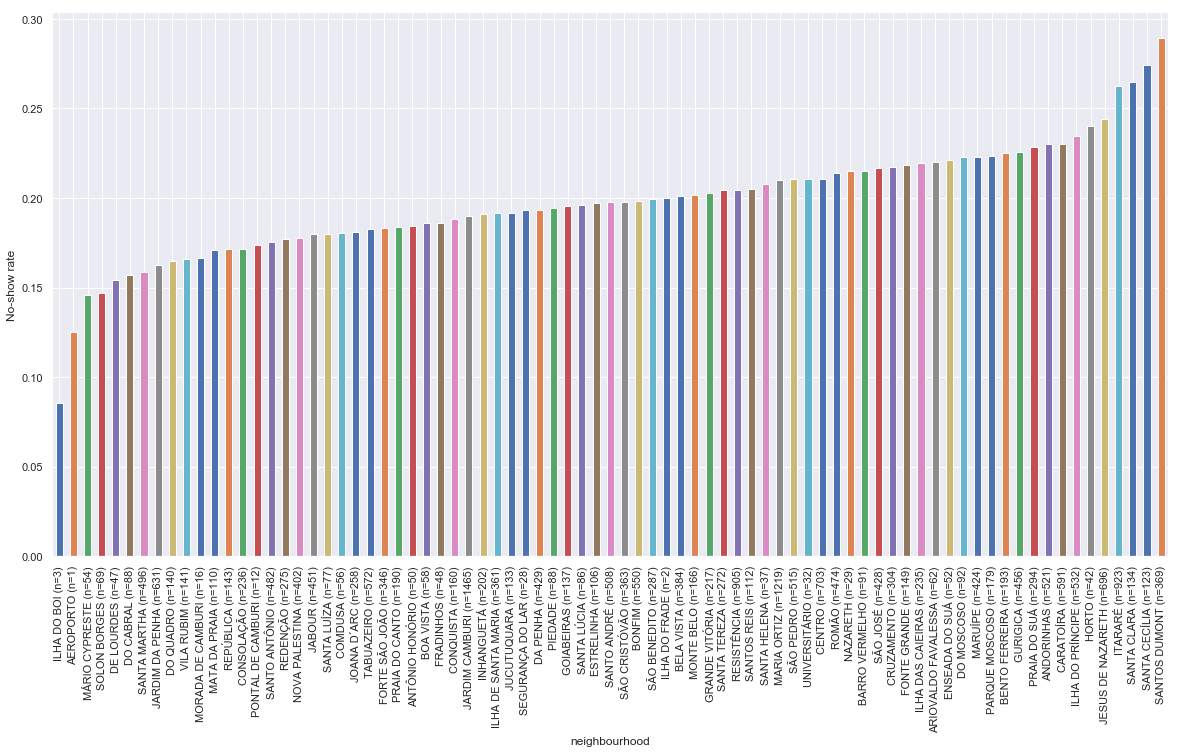

In [42]:
nh_no = df_no.groupby('neighbourhood').size()
nh_yes = df_yes.groupby('neighbourhood').size()
nh_total = df.groupby('neighbourhood').size()
nh_rate = nh_no / nh_total

nh_rate.sort_values()[:-2].plot('bar', figsize=(20, 10))
locs, labels = plt.xticks()
labels = list(map(lambda x: x.get_text(), labels))
xtick_labels = [label +' (n={})'.format(nh_no[label]) for label in labels]
plt.xticks(locs, xtick_labels, rotation=90)
plt.ylabel('No-show rate')
plt.show()

- `neighbourhood` seems to be related the no-show rate. I think we need more information (e.g. latitude, longitude, the distance from the patient's house) to investigate the pattern above.

### Research Question 1
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

- age_gruop:
    - Age group 1 and 2 have a high no-show rate.
    - Age group 5~8 have a low no-show rate.
    - Age group 0 and 9 have the average no-show rate
- days_to_app: The longer `days_to_app` is, the less likely the patients are to show up.
- sms_received: The patients who received SMS reminders have a about 0.05 lower no-show rate than those who didn't.

Other that the features above, the boolean features (scholarship, hipertension, diabetes, alcoholism, is_handicapped) and neighbourhood seem to be related to the no-show rate.

<a id='conclusions'></a>
# Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

I have looked at most of the features in the dataset. Some of them show relationships with whether the patients showed up to the appointment.

I found the following features affect the no-show rate of the patients.
- age_gruop:
    - Age group 10~29 have a high no-show rate.
    - Age group 50~89 have a low no-show rate.
    - Age group 0~9 and 90~99 have the average no-show rate
- days_to_app: The longer days_to_app is, the less likely the patients are to show up.
- sms_received: The patients who received SMS reminders have a about 0.05 lower no-show rate than those who didn't.

Other that the features above, the boolean features (scholarship, hipertension, diabetes, alcoholism, is_handicapped) and neighbourhood seem to be related to the no-show rate. 

### Findings
- The female patients with alcoholism have a much higher no-show rate than the male patients with alcoholism.


### Limitations
- This is an EDA to provide insights for further analysis and relationships between each feature are not sufficiently investigated.
- Statistical modeling is necessary to determine which feature explains or predicts no-show rate effectively.
- As I pointed out in the early part of this EDA, some patients visit the hospital multiple times in a day. One possible reasoning is that consecutive visits to different departments are counted as appointment. The provider of this dataset should clarify about this.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1